# Tasca M10 T01

## Objectivos
- Web scraping. 
- Documentar datos recogidos con web scraping.

## Duración: 
4 días

## Descripción
Ejercicios de Web Scraping.

In [4]:
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

In [5]:
url_quotes_s= "http://quotes.toscrape.com"
opts = Options()
opts.add_argument('-headless=new')
browser = Chrome(options=opts)
browser.get(url_quotes_s)

NoSuchDriverException: Message: Unable to obtain driver for chrome using Selenium Manager.; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location


In [6]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

driver = webdriver.Safari() 

NoSuchDriverException: Message: Unable to obtain driver for safari using Selenium Manager.; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location


In [7]:
from selenium import webdriver

# Inicializa el navegador Safari
driver = webdriver.Safari()

# Abre una URL de prueba, puedes cambiarla por la que necesites
driver.get("https://www.google.com")

# Realiza operaciones en la página

# Cierra el navegador
driver.quit()

NoSuchDriverException: Message: Unable to obtain driver for safari using Selenium Manager.; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location


In [8]:
from selenium import webdriver

# Especifica la ubicación del ejecutable de Safari
safari_executable = "/Applications/Safari.app/Contents/MacOS/Safari"

# Inicializa el navegador Safari con la ubicación del ejecutable
driver = webdriver.Safari(executable_path=safari_executable)

# Abre una URL de prueba, puedes cambiarla por la que necesites
driver.get("https://www.google.com")

# Realiza operaciones en la página

# Cierra el navegador
driver.quit()

TypeError: WebDriver.__init__() got an unexpected keyword argument 'executable_path'

In [9]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.9 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install --upgrade selenium

Note: you may need to restart the kernel to use updated packages.


# Ejercicio 1
Realiza web scraping de dos de las tres páginas web propuestas utilizando BeautifulSoup primero y Selenium después.

- http://quotes.toscrape.com
- https://www.bolsamadrid.es
- www.wikipedia.es (fes alguna cerca primer i escrapeja algun contingut)

### 1.1.- http://quotes.toscrape.com con BEAUTIFUL SOUP

In [11]:
# HACER LA SOLICITUD A LA URL

import requests

URL = "http://quotes.toscrape.com"
page = requests.get(URL)

print(page.text)

# Este código emite una solicitud HTTP GET a la URL proporcionada. 
# Recupera los datos HTML que el servidor envía y almacena esos datos en un objeto Python.

<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
</head>
<body>
    <div class="container">
        <div class="row header-box">
            <div class="col-md-8">
                <h1>
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
                </h1>
            </div>
            <div class="col-md-4">
                <p>
                
                    <a href="/login">Login</a>
                
                </p>
            </div>
        </div>
    

<div class="row">
    <div class="col-md-8">

    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">
        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
        <span>by <small class="author" itempr

In [12]:
# ANALIZAR EL CÓDIGO HTML CON BEAUTIFUL SOUP

# Importar la biblioteca en su secuencia de comandos Python y crear un objeto Beautiful Soup:

from bs4 import BeautifulSoup

page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

# Se crea un objeto Beautiful Soup que toma como entrada page.content, que es el contenido HTML extraido.
# El atributo .content evita problemas con la codificación de caracteres que sí que daría el .test.
# El argumento, "html.parser" garantiza que utilice el analizador adecuado para el contenido HTML.

In [13]:
# BUSCAR EL O LOS ELEMENTOS QUE CONTIENEN TODAS LAS CITAS:
# En este caso el elemento que lo contiene todo es <div class="col-md-8"> (no hay ID identificador).
# Hay que buscar en la página de Beautiful Soup cómo es la sintaxis correcta para extraer los resultados

results = soup.find_all("div", class_="col-md-8")
results

[<div class="col-md-8">
 <h1>
 <a href="/" style="text-decoration: none">Quotes to Scrape</a>
 </h1>
 </div>,
 <div class="col-md-8">
 <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
 <span>by <small class="author" itemprop="author">Albert Einstein</small>
 <a href="/author/Albert-Einstein">(about)</a>
 </span>
 <div class="tags">
             Tags:
             <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
 <a class="tag" href="/tag/change/page/1/">change</a>
 <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
 <a class="tag" href="/tag/thinking/page/1/">thinking</a>
 <a class="tag" href="/tag/world/page/1/">world</a>
 </div>
 </div>
 <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text

In [14]:
# Intento imprimir la selección para visuaalizarlo teniendo en cuenta las posiciones de las divisiones HTML. 
# Experimento que al utilizar "soup.find_all" estoy obteniendo una lista de elementos, en lugar de  
# un objeto de Beautiful Soup, que es lo que yo necesitaría para aplicar la función prettify() directamente sobre results.
# La forma de solucionarlo es haciendo un for para que me imprima cada objeto de Beautiful Soup: 

for result in results:
    print(result.prettify())

<div class="col-md-8">
 <h1>
  <a href="/" style="text-decoration: none">
   Quotes to Scrape
  </a>
 </h1>
</div>

<div class="col-md-8">
 <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
  <span class="text" itemprop="text">
   “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
  </span>
  <span>
   by
   <small class="author" itemprop="author">
    Albert Einstein
   </small>
   <a href="/author/Albert-Einstein">
    (about)
   </a>
  </span>
  <div class="tags">
   Tags:
   <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
   <a class="tag" href="/tag/change/page/1/">
    change
   </a>
   <a class="tag" href="/tag/deep-thoughts/page/1/">
    deep-thoughts
   </a>
   <a class="tag" href="/tag/thinking/page/1/">
    thinking
   </a>
   <a class="tag" href="/tag/world/page/1/">
    world
   </a>
  </div>
 </div>
 <div class="quote" itemscope="" itemtype=

In [15]:
len(results)

2

In [16]:
# Veo que la lista que me ofrece como esultado contiene dos elementos: El primero que contiene el título de la web
# y el segundo que es el objeto que contien todas las citas que me interesan.
# Selecciono el segundo objeto de la lista llamándole por su índice:

results = results[1]
print(results.prettify())

<div class="col-md-8">
 <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
  <span class="text" itemprop="text">
   “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
  </span>
  <span>
   by
   <small class="author" itemprop="author">
    Albert Einstein
   </small>
   <a href="/author/Albert-Einstein">
    (about)
   </a>
  </span>
  <div class="tags">
   Tags:
   <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
   <a class="tag" href="/tag/change/page/1/">
    change
   </a>
   <a class="tag" href="/tag/deep-thoughts/page/1/">
    deep-thoughts
   </a>
   <a class="tag" href="/tag/thinking/page/1/">
    thinking
   </a>
   <a class="tag" href="/tag/world/page/1/">
    world
   </a>
  </div>
 </div>
 <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
  <span class="text" itemprop="text">
   “It is our choices, Harry, that show what

In [17]:
len(results)

23

### Buscar elementos por nombre de clase HTML

Por los que veo, cada Cita está contenida en un elemento "< div >" con la clase "quote". Observo que:
    
- class="quote" contiene la caja de cada texto
- class="text" contiene el texto (la cita)
- class="author" contiene el autor (pero la class="author" no es introcida por un __<div__, sino por un __<small__ ???
- class="tags" contiene las etiquetas.

In [18]:
# Buscar elementos por nombre de clase HTML

citas = results.find_all("div", class_="quote")

# .find_all() devuelve un iterable que contiene todo el HTML de todas las citas de la página.

for cita in citas:
    print(cita, end="\n"*2)

    # La opción end="\n"*2 se utiliza para imprimir dos saltos de línea después de cada elemento. 

<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div>

<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<span>by <small class="author" itemprop="author">J.K. 

In [19]:
# BUSCAR ELEMENTOS SECUNDARIOS QUE TIENEN NOMBRES DE CLASES DESCRIPTIVOS

for cita in citas:
    texto_cita = cita.find("span", class_="text")
    author_cita = cita.find("small", class_="author")
    tags_cita = cita.find("div", class_="tags")
    print(texto_cita)
    print(author_cita)
    print(tags_cita)
    print()

<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<small class="author" itemprop="author">Albert Einstein</small>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>

<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<small class="author" itemprop="author">J.K. Rowling</small>
<div class="tags">
            Tags:
            <meta class="keywords" content="abilities,choices" itemprop="keywords"/>
<a class="tag" href="/tag/abilities/page/1/">abilities</a>
<a class="tag" href="/tag/choice

In [20]:
# Ahora cada cita es un objeto Beautiful Soup()
# Para extraer el contenido de cada elemento, voy a utilizar los mismos métodos que utilicé en el elemento principal "citas":
# Lo que voy a extraer de cada elemento es: 1) la cita, 2) el autor y 3) todos los tags con los que está etiquetada la cita.

for cita in citas:
    texto_cita = cita.find("span", class_="text")
    author_cita = cita.find("small", class_="author")
    tags_cita = cita.find("div", class_="tags")
    print(texto_cita.text)
    print(author_cita.text)
    print(tags_cita.text)
    print()

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Albert Einstein

            Tags:
            
change
deep-thoughts
thinking
world


“It is our choices, Harry, that show what we truly are, far more than our abilities.”
J.K. Rowling

            Tags:
            
abilities
choices


“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Albert Einstein

            Tags:
            
inspirational
life
live
miracle
miracles


“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Jane Austen

            Tags:
            
aliteracy
books
classic
humor


“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Marilyn Monroe

            Tags:
            
be-yourself
inspirational


“Try not to become a man of success. Rather become a man

In [21]:
# ELIMINAR LOS ESPACIOS EN BLANCO SUPERFLUOS con .strip()

for cita in citas:
    texto_cita = cita.find("span", class_="text")
    author_cita = cita.find("small", class_="author")
    tags_cita = cita.find("div", class_="tags")
    print(texto_cita.text.strip())
    print(author_cita.text.strip())
    print(tags_cita.text.strip())
    print()

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Albert Einstein
Tags:
            
change
deep-thoughts
thinking
world

“It is our choices, Harry, that show what we truly are, far more than our abilities.”
J.K. Rowling
Tags:
            
abilities
choices

“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Albert Einstein
Tags:
            
inspirational
life
live
miracle
miracles

“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Jane Austen
Tags:
            
aliteracy
books
classic
humor

“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Marilyn Monroe
Tags:
            
be-yourself
inspirational

“Try not to become a man of success. Rather become a man of value.”
Albert Einstein
Tags:
            
adulthood
success
value

In [22]:
# Como no me gusta como me devuelve las Tags, en líneas diferentes, corrijo código para obtenerlas en la misma línea:

for cita in citas:
    texto_cita = cita.find("span", class_="text")
    author_cita = cita.find("small", class_="author")
    tags_cita = cita.find("div", class_="tags")
    
    # Imprimo primero el texto de la cita y el autor
    print(texto_cita.text.strip())
    print(author_cita.text.strip())
    
    # Quiero imprimir después las etiquetas en la misma línea y separadas por barras.
    # Para ello, primero uso: tags_cita.find_all("a", class_="tag") para buscar todas las etiquetas 
    # Las etiquetas están identificadas con <a>.
    # A cada elemento <a> le aplico tag.text.strip() para extraer su texto y eliminar espacios en blanco antes y después.
    # Todo lo meto en una lista de python [...] con un for para que itere por cada elemento de las etiquetas.
    # identifico esa lista con "tags"
    
    tags = [tag.text.strip() for tag in tags_cita.find_all("a", class_="tag")]
    
    # Para imprimir creo a mano la cadena "Tags: " 
    # y con .join(tags) cojo la lista creada y la junto en una sola cadena separada con "/"
    
    print("Tags:", "/ ".join(tags))
    
    print()

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Albert Einstein
Tags: change/ deep-thoughts/ thinking/ world

“It is our choices, Harry, that show what we truly are, far more than our abilities.”
J.K. Rowling
Tags: abilities/ choices

“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Albert Einstein
Tags: inspirational/ life/ live/ miracle/ miracles

“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Jane Austen
Tags: aliteracy/ books/ classic/ humor

“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Marilyn Monroe
Tags: be-yourself/ inspirational

“Try not to become a man of success. Rather become a man of value.”
Albert Einstein
Tags: adulthood/ success/ value

“It is better to be hated for what you are than to be loved fo

In [23]:
# BUSCAR ELEMENTOS POR NOMBRE DE CLASE Y CONTENIDO DE TEXTO

# 1º Filtrar por palabras clave: (en esta web los textos de las citas están dentro de <span>)
# Se puede usar el argumento string= "" que busca cadenas de texto completas.

cita_man = results.find_all("span", string="man")
cita_man

# En este caso nos da una lista vacía ¿por qué? ¿hay algún fallo que tiene que ver con la ortografía?

[]

In [24]:
# Solución: pasar funciones como argumentos a los métodos Beautiful Soup
cita_man = results.find_all(
    "span", string=lambda text: "man" in text.lower()
)

# La función lambda mira el texto de cada elemento <h2>, lo convierte a minúsculas y comprueba 
# si la subcadena "python"se encuentra en algún lugar.

cita_man

AttributeError: 'NoneType' object has no attribute 'lower'

### 1.2.- wikipedia / Los Museos de Arte más visitados con BEAUTIFUL SOUP

In [25]:
# HACER LA SOLICITUD A LA URL

import requests

URL = "https://es.wikipedia.org/wiki/Anexo:Museos_de_arte_m%C3%A1s_visitados"
page_w = requests.get(URL)

print(page_w.text)

# Este código emite una solicitud HTTP GET a la URL proporcionada. 
# Recupera los datos HTML que el servidor envía y almacena esos datos en un objeto Python.

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" lang="es" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Anexo:Museos de arte más visitados - Wikipedia, la enciclopedia libre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vect

La división que contiene la información relavante de la web: 
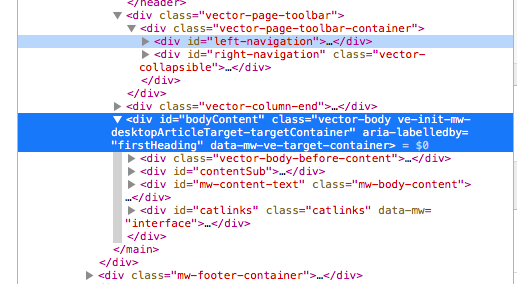


La división que contiene la información de la tabla:

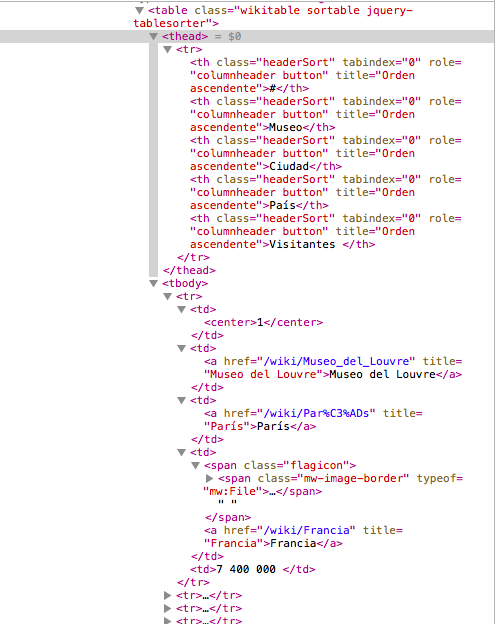

In [27]:
# ANALIZAR EL CÓDIGO HTML CON BEAUTIFUL SOUP

# Importar la biblioteca en su secuencia de comandos Python y crear un objeto Beautiful Soup:

from bs4 import BeautifulSoup

page_w = requests.get(URL)

soup_w = BeautifulSoup(page_w.content, "html.parser")

# Se crea un objeto Beautiful Soup que toma como entrada page.content, que es el contenido HTML extraido.
# El atributo .content evita problemas con la codificación de caracteres que sí que daría el .test.
# El argumento, "html.parser" garantiza que utilice el analizador adecuado para el contenido HTML.

In [28]:
# BUSCAR EN LA WEB ELEMENTOS POR SU ID QUE APARECE EN LA HTML:

results_w = soup_w.find(id="bodyContent")
print(results_w.prettify())

<div aria-labelledby="firstHeading" class="vector-body" data-mw-ve-target-container="" id="bodyContent">
 <div class="vector-body-before-content">
  <div class="mw-indicators">
  </div>
  <div class="noprint" id="siteSub">
   De Wikipedia, la enciclopedia libre
  </div>
 </div>
 <div id="contentSub">
  <div id="mw-content-subtitle">
  </div>
 </div>
 <div class="mw-body-content" id="mw-content-text">
  <div class="mw-content-ltr mw-parser-output" dir="ltr" lang="es">
   <table class="noprint plainlinks ambox ambox-content" style="">
    <tbody>
     <tr>
      <td class="ambox-image" width="40">
       <span class="mw-default-size" typeof="mw:File">
        <a class="mw-file-description" href="/wiki/Archivo:Ambox_outdated_serious.svg">
         <img alt="" class="mw-file-element" data-file-height="620" data-file-width="620" decoding="async" height="40" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/8f/Ambox_outdated_serious.svg/40px-Ambox_outdated_serious.svg.png" srcset="//uplo

In [29]:
# BUSCAR LOS ELEMNTOS QUE CONTIENE LA TABLA:

results_table = soup_w.find("table", class_="wikitable sortable")
print(results_table.prettify())

<table class="wikitable sortable">
 <tbody>
  <tr>
   <th>
    #
   </th>
   <th>
    Museo
   </th>
   <th>
    Ciudad
   </th>
   <th>
    País
   </th>
   <th>
    Visitantes
   </th>
  </tr>
  <tr>
   <td>
    <center>
     1
    </center>
   </td>
   <td>
    <a href="/wiki/Museo_del_Louvre" title="Museo del Louvre">
     Museo del Louvre
    </a>
   </td>
   <td>
    <a href="/wiki/Par%C3%ADs" title="París">
     París
    </a>
   </td>
   <td>
    <span class="flagicon">
     <span class="mw-image-border" typeof="mw:File">
      <a class="mw-file-description" href="/wiki/Archivo:Flag_of_France_(1794%E2%80%931815,_1830%E2%80%931974).svg" title="Bandera de Francia">
       <img alt="Bandera de Francia" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/93/Flag_of_France_%281794%E2%80%931815%2C_1830%E2%80%931974%29.svg/20px-Flag_of_France_%281794%E2%80%931815%2C_1830%E2%80%931974%29

In [30]:
# Para imprimir la selección de la tabla teniendo en cuenta las posiciones de las divisiones: 

print(results_table.prettify())

<table class="wikitable sortable">
 <tbody>
  <tr>
   <th>
    #
   </th>
   <th>
    Museo
   </th>
   <th>
    Ciudad
   </th>
   <th>
    País
   </th>
   <th>
    Visitantes
   </th>
  </tr>
  <tr>
   <td>
    <center>
     1
    </center>
   </td>
   <td>
    <a href="/wiki/Museo_del_Louvre" title="Museo del Louvre">
     Museo del Louvre
    </a>
   </td>
   <td>
    <a href="/wiki/Par%C3%ADs" title="París">
     París
    </a>
   </td>
   <td>
    <span class="flagicon">
     <span class="mw-image-border" typeof="mw:File">
      <a class="mw-file-description" href="/wiki/Archivo:Flag_of_France_(1794%E2%80%931815,_1830%E2%80%931974).svg" title="Bandera de Francia">
       <img alt="Bandera de Francia" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/93/Flag_of_France_%281794%E2%80%931815%2C_1830%E2%80%931974%29.svg/20px-Flag_of_France_%281794%E2%80%931815%2C_1830%E2%80%931974%29

### NOTA ACLARATOIRA: 
__Las tablas se organizan por filas:__ 
- __< thead > < tr >__ introduce la primera fila, que contiene el nombre de las __COLUMNAS__. A cada columna se accede con __< th__.
- __< tbody > < tr >__ introduce el resto de las filas, que contienen los __DATOS__. A cada dato se accede con __< td__.
                                                                                                       
### TENIEDO ESTO EN CUENTA: 
- 1.- Iinerando en la __TABLA__ por __<tr__ obtendré dos objetos: __*ENCABEZAMIENTO Y CUERPO*__.
- 2.- Itinerando en el __ENCABEZAMIENTO__ por __<th__ obtendré los __*NOMBRES DE LAS COLUMNAS*__.
- 3.- Itinerando en el __CUERPO__ por __<td__ obtendré los __*DATOS DE LA TABLA*__.



In [31]:
#for fila in results_table('tr')[1:]:
    #if fila.find_all('td'):
        #print(fila.find_all('td'))
        #print (fila.find_all('td')[0].text.strip())
    

In [32]:
ranking

NameError: name 'ranking' is not defined

In [33]:
encabezados_final = []

for fila in results_table('tr')[0:]:
    # Obtener los encabezados
    if fila.find_all('th'):
        encabezados = fila.find_all('th')
        for encabezado in encabezados: 
            encabezados_final.append(encabezado.text.strip())
        print("Encabezados:")
        print(", ".join(encabezados_final))
        print()
    
    # Obtener los datos de cada fila
    else:
        datos = fila.find_all('td')
        #print(datos)

        # Obtener los datos individuales
        ranking = datos[0].text.strip()
        museo = datos[1].text.strip()
        ciudad = datos[2].text.strip()
        pais = datos[3].text.strip()
        visitantes = datos[4].text.strip()
        
        print("Ranking:", ranking)
        print("Museo:", museo)
        print("Ciudad:", ciudad)
        print("País:", pais)
        print("Visitantes/año:", visitantes)
        print()
    
 

Encabezados:
#, Museo, Ciudad, País, Visitantes

Ranking: 1
Museo: Museo del Louvre
Ciudad: París
País: Francia
Visitantes/año: 7 400 000

Ranking: 2
Museo: Museo Metropolitano de Arte
Ciudad: Nueva York
País: Estados Unidos
Visitantes/año: 7 006 859

Ranking: 3
Museo: Museo Británico
Ciudad: Londres
País: Reino Unido
Visitantes/año: 6 420 395

Ranking: 4
Museo: National Gallery de Londres
Ciudad: Londres
País: Reino Unido
Visitantes/año: 6 262 839

Ranking: 5
Museo: Museo Nacional del Palacio
Ciudad: Taipéi
País: Taiwán
Visitantes/año: 6 142 892

Ranking: 6
Museo: Museos Vaticanos
Ciudad: Roma
País: Ciudad del Vaticano
Visitantes/año: 6 066 649

Ranking: 7
Museo: Tate Modern
Ciudad: Londres
País: Reino Unido
Visitantes/año: 5 839 197

Ranking: 8
Museo: Galería Nacional de Arte
Ciudad: Washington D C
País: Estados Unidos
Visitantes/año: 4 261 391

Ranking: 9
Museo: Museo del Hermitage
Ciudad: San Petersburgo
País: Rusia
Visitantes/año: 4 119 103

Ranking: 10
Museo: Museo Nacional Centr

In [34]:
encabezados_final = []
Ranking =[]
Museo =[]
Ciudad = []
Pais = []
Visitantes = []
for fila in results_table('tr')[0:]:
    # Obtener los encabezados
    if fila.find_all('th'):
        encabezados = fila.find_all('th')
        for encabezado in encabezados: 
            encabezados_final.append(encabezado.text.strip())
        print("Encabezados:")
        print(", ".join(encabezados_final))
        print()
    
    # Obtener los datos de cada fila
    else:
        datos = fila.find_all('td')
        #print(datos)

        # Obtener los datos individuales
        ranking = datos[0].text.strip()
        Ranking.append(ranking)
        museo = datos[1].text.strip()
        Museo.append(museo)
        ciudad = datos[2].text.strip()
        Ciudad.append(ciudad)
        pais = datos[3].text.strip()
        Pais.append(pais)
        visitantes = datos[4].text.strip()        
        Visitantes.append(visitantes)
        
        print(encabezados_final[0]+":",ranking)
        print(encabezados_final[1]+":",museo)
        print(encabezados_final[2]+":",ciudad)
        print(encabezados_final[3]+":",pais)
        print(encabezados_final[4]+":",visitantes)
        print()

Encabezados:
#, Museo, Ciudad, País, Visitantes

#: 1
Museo: Museo del Louvre
Ciudad: París
País: Francia
Visitantes: 7 400 000

#: 2
Museo: Museo Metropolitano de Arte
Ciudad: Nueva York
País: Estados Unidos
Visitantes: 7 006 859

#: 3
Museo: Museo Británico
Ciudad: Londres
País: Reino Unido
Visitantes: 6 420 395

#: 4
Museo: National Gallery de Londres
Ciudad: Londres
País: Reino Unido
Visitantes: 6 262 839

#: 5
Museo: Museo Nacional del Palacio
Ciudad: Taipéi
País: Taiwán
Visitantes: 6 142 892

#: 6
Museo: Museos Vaticanos
Ciudad: Roma
País: Ciudad del Vaticano
Visitantes: 6 066 649

#: 7
Museo: Tate Modern
Ciudad: Londres
País: Reino Unido
Visitantes: 5 839 197

#: 8
Museo: Galería Nacional de Arte
Ciudad: Washington D C
País: Estados Unidos
Visitantes: 4 261 391

#: 9
Museo: Museo del Hermitage
Ciudad: San Petersburgo
País: Rusia
Visitantes: 4 119 103

#: 10
Museo: Museo Nacional Centro de Arte Reina Sofía
Ciudad: Madrid
País: España
Visitantes: 3 646 598

#: 11
Museo: Somerset H

In [35]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.array([Ranking], [Museo], [Ciudad], [Pais], [Visitantes]),
                   columns=[encabezados_final])
df


TypeError: array() takes from 1 to 2 positional arguments but 5 were given

In [36]:
import pandas as pd

# Creo el Dataframe directamente desde las listas que he construido en el apartado anterior

df = pd.DataFrame({
    encabezados_final[0]: Ranking,
    encabezados_final[1]: Museo,
    encabezados_final[2]: Ciudad,
    encabezados_final[3]: Pais,
    encabezados_final[4]: Visitantes
})
df

,#,Museo,Ciudad,País,Visitantes
0,1,Museo del Louvre,París,Francia,7 400 000
1,2,Museo Metropolitano de Arte,Nueva York,Estados Unidos,7 006 859
2,3,Museo Británico,Londres,Reino Unido,6 420 395
3,4,National Gallery de Londres,Londres,Reino Unido,6 262 839
4,5,Museo Nacional del Palacio,Taipéi,Taiwán,6 142 892
...,...,...,...,...,...
95,96,Museo Nacional de Cracovia,Cracovia,Polonia,770 714
96,97,Museo de Historia del Arte de Viena,Viena,Austria,769 119
97,98,Instituto de Artes de Minneapolis,Minneapolis,Estados Unidos,767 590
98,99,Galería Renwick,Washington D C,Estados Unidos,765 000


# Ejercicio 2
Documenta en un Word tu conjunto de datos generado con la información que tienen los distintos archivos de Kaggle.
Per saber més
A manera d'exemple del que es demana pots consultar aquest enllaç:
->https://www.kaggle.com/datasets/vivovinco/20212022-football-team-stats.



## Museos de arte más visitados

### About Dataset


#### CONTEXT:
Este dataset contiene datos sobre el número de visitantes/año de los 100 museos más visitados del mundo.

#### CONTENT:
100 filas y cinco columnas.

A continuación se realiza la descripción de las colunmnas:

- #: Ranking en el número de visitas.
- Museo: Nombre del museo.
- Ciudad: Ciudad en la que se encuentra el museo.
- País: País al que pertenece el museo.
- Visitantes: Número de visitantes por año. 

#### DATA SOURCE: 
- Origen: Wikipedia.
- Web: https://es.wikipedia.org/wiki/Anexo:Museos_de_arte_más_visitados
- Fecha de extracción: 12/02/2024



# Ejercicio 3
Elige una página web que quieras y realiza web scraping mediante la librería Selenium primero y Scrapy después.



In [37]:
# HACER LA SOLICITUD A LA URL

import requests

URL = "https://privateviews.artlogic.net/2/70b8fdf012ac15be2e3429/"
leonard = requests.get(URL)

print(leonard.text)

# Este código emite una solicitud HTTP GET a la URL proporcionada. 
# Recupera los datos HTML que el servidor envía y almacena esos datos en un objeto Python.






<!DOCTYPE html>
<html class="aui-theme-light aui-font-size-13 aui-font-family-system_default">
    <head>
        <meta charset="utf-8">
        <meta name="description" content="" />
        <meta name="pinterest" content="nopin" />
        <meta name="keywords" content="" />
        <meta name="viewport" content="width=device-width, minimum-scale=0.5, maximum-scale=1, initial-scale=1" />
        <meta name="apple-mobile-web-app-capable" content="yes">
        <meta name="google" content="notranslate" />

        <title>Léonard Pongo  | Kristof De Clercq gallery</title>

        <meta property="og:site_name" content="LOTIKA BVBA | Kristof De Clercq gallery" />
        <meta property="og:url" content="https://privateviews.artlogic.net/2/70b8fdf012ac15be2e3429/" />
        <meta property="og:title" content="Léonard Pongo  | Kristof De Clercq gallery" />
        <meta property="og:description" content="Kristof De Clercq is delighted to present the first solo exhibition of Léonard Pon

In [38]:
# ANALIZAR EL CÓDIGO HTML CON BEAUTIFUL SOUP

# Importar la biblioteca en su secuencia de comandos Python y crear un objeto Beautiful Soup:

from bs4 import BeautifulSoup

leonard = requests.get(URL)

soup_leonard = BeautifulSoup(leonard.content, "html.parser")

# Se crea un objeto Beautiful Soup que toma como entrada page.content, que es el contenido HTML extraido.
# El atributo .content evita problemas con la codificación de caracteres que sí que daría el .test.
# El argumento, "html.parser" garantiza que utilice el analizador adecuado para el contenido HTML.

In [44]:
# BUSCAR EL O LOS ELEMENTOS QUE CONTIENEN LOS DATOS DE CADA FOTO:
# En este caso el elemento que lo contiene todo es <"div class="aui-caption pv-item-details""> (no hay ID identificador).
# Hay que buscar en la página de Beautiful Soup cómo es la sintaxis correcta para extraer los resultados

results_l = soup.find_all("div", class_="aui-caption pv-item-details")
print(results_l)

[]


In [ ]:
<div class="aui-caption pv-item-details">
                                    <div class="artist"><strong>Léonard Pongo</strong></div>
                        <div class="title"><em>Cross</em>, 2019</div>
                        <div class="medium">Giclée print on Hahnemuhle Fine Art Mat Ultrasmooth</div>
                        <div class="dimensions">60 x 40 cm</div>
                        <div class="edition_details">Edition of 7 plus 2 artist's proofs (#1/7)</div>
                        <div class="stock_number">(LP31)</div>
                                        <div class="aui-availability aui-availability-available"></div>
                                    <div class="pv-item-price">€ 2,500.00 incl VAT</div>
                                
                                <div class="pv-credits">
                                    
                                    
                                    
                                </div>
                            </div>